### Objective:
Using Data Science tools for conducting a preliminary prognosis of Hypertension/hypotension, based on **the level of hemoglobin and genetic history of the individual**.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Training Data - Classification of Patients with Abnormal Blood Pressure (N=2000)_27-Jul-2016.csv")

In [2]:
df.shape
#15 features and 2000 entries in the rows

(2000, 15)

In [3]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
df.describe(include='all')

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Patient_Number                   2000 non-null int64
Blood_Pressure_Abnormality       2000 non-null int64
Level_of_Hemoglobin              2000 non-null float64
Genetic_Pedigree_Coefficient     1908 non-null float64
Age                              2000 non-null int64
BMI                              2000 non-null int64
Sex                              2000 non-null int64
Pregnancy                        442 non-null float64
Smoking                          2000 non-null int64
Physical_activity                2000 non-null int64
salt_content_in_the_diet         2000 non-null int64
alcohol_consumption_per_day      1758 non-null float64
Level_of_Stress                  2000 non-null int64
Chronic_kidney_disease           2000 non-null int64
Adrenal_and_thyroid_disorders    2000 non-null int64
dtypes: float64(4), int64(11)
memory usage: 234.4 KB


<p> Data is mostly clean with all of the features having *int* or *float* type, with no object type data </p></br>
<p>**Genetic_Pedigree_Coefficient** and **alcohol_consumption_per_day** have some missing values.</p> </n>
Whereas, **pregnancy** feature has very large missing values. Which is the innate nature of the data as all of the patients can't be pregnant women. Because pregnancy data is given only for mostly female patient where Sex = 1.

### Checking for Correlated Features (Collinearity)

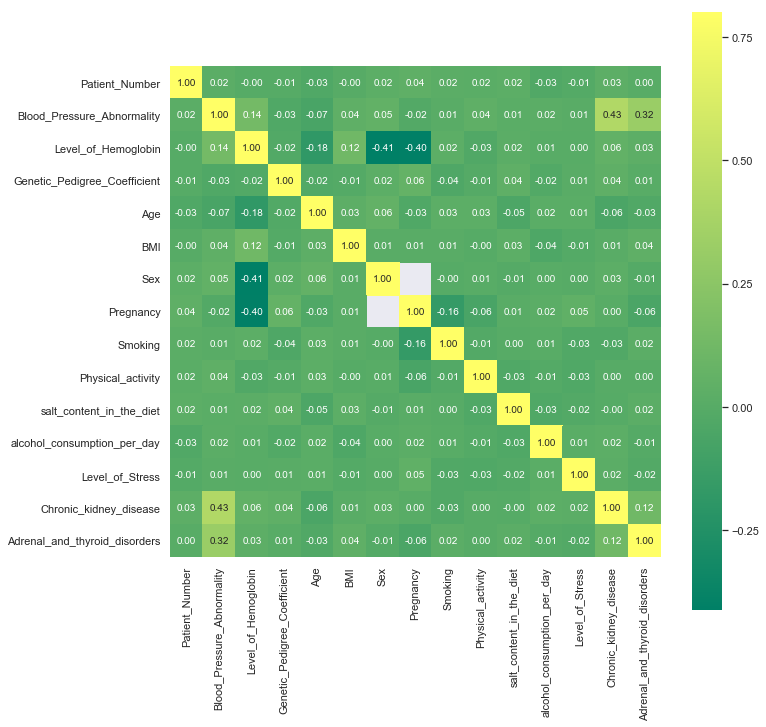

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

% matplotlib inline
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='summer' );
#No significant correlated features found all are below 0.5

<p>There is no evident linear relationship in the non-categorical features</p></n>
Initially we only need to perform classification using only two features: *Level_of_Hemoglobin* and *Genetic_Pedigree_Coefficient*

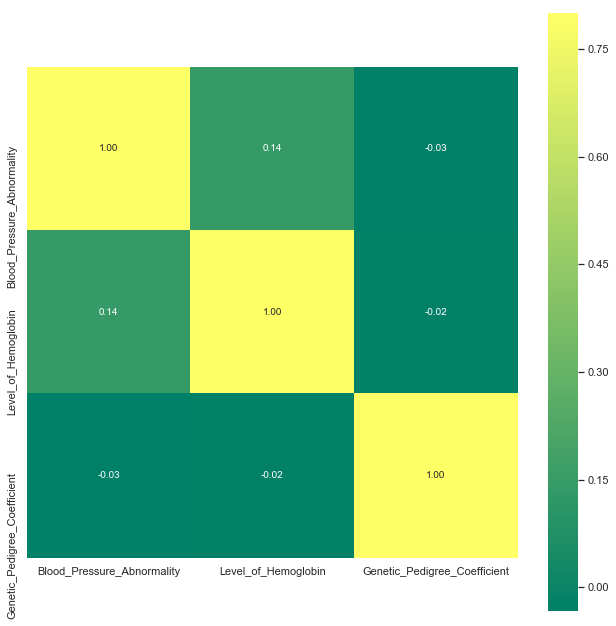

In [7]:
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.iloc[:,1:4].corr(), vmax=.8, square=True, annot=True, fmt='.2f', cmap='summer' );
#No significant correlated features found

### Missing value treatment

In [8]:
df.isnull().any(axis=0)

Patient_Number                   False
Blood_Pressure_Abnormality       False
Level_of_Hemoglobin              False
Genetic_Pedigree_Coefficient      True
Age                              False
BMI                              False
Sex                              False
Pregnancy                         True
Smoking                          False
Physical_activity                False
salt_content_in_the_diet         False
alcohol_consumption_per_day       True
Level_of_Stress                  False
Chronic_kidney_disease           False
Adrenal_and_thyroid_disorders    False
dtype: bool

In [9]:
df['Genetic_Pedigree_Coefficient'].isnull().value_counts()

False    1908
True       92
Name: Genetic_Pedigree_Coefficient, dtype: int64

There are minimal no. of missing values so we can fill them with simple imputation with median

In [10]:
#median imputation
median = df['Genetic_Pedigree_Coefficient'].median()
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(median)

In [11]:
#checking for hidden missing values
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing in Level_of_Hemoglobin: {0}".format(df['Level_of_Hemoglobin'].isnull().sum()))
print("# rows missing in Genetic_Pedigree_Coefficient: {0}".format(df['Genetic_Pedigree_Coefficient'].isnull().sum()))

# rows in dataframe 2000
# rows missing in Level_of_Hemoglobin: 0
# rows missing in Genetic_Pedigree_Coefficient: 0


In [12]:
#check True/False ratio
num_false = len(df[df['Blood_Pressure_Abnormality'] == 0])
num_true = len(df[df['Blood_Pressure_Abnormality'] == 1])
print("no. of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false*100/(num_false+num_true))))
print("no. of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true*100/(num_false+num_true))))
#both cases have fair amount of cases standard predictions can be used
#Good distribution of true and false cases. No special work needed.

no. of false cases: 1013 (50.00%)
no. of true cases: 987 (49.00%)


C:\Users\kapil\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


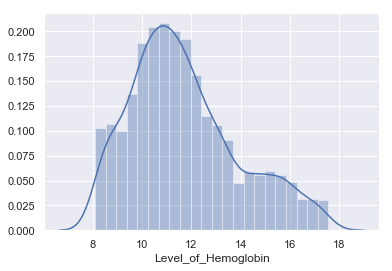

In [13]:
sns.distplot(df['Level_of_Hemoglobin']);

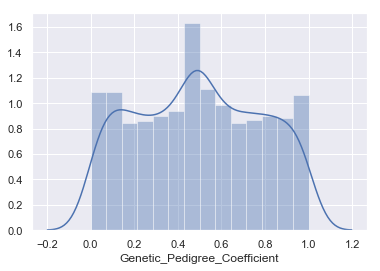

In [14]:
sns.distplot(df['Genetic_Pedigree_Coefficient']);

### Outliers Visualization for all features

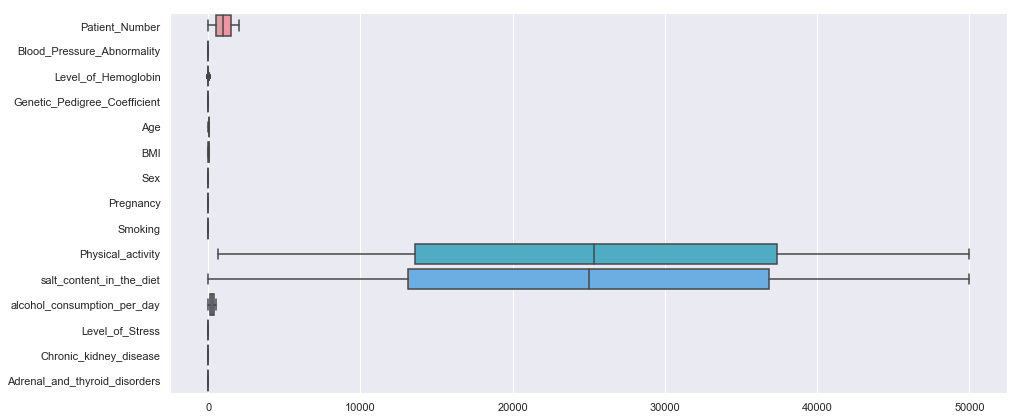

In [15]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df, orient='h');

##### There are no outliers.

### Spliting the data

In [16]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']
predicted_class_names = ['Blood_Pressure_Abnormality']
X= df[feature_col_names].values
y= df[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
#check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

0.00% in training set
0.00% in test set


In [18]:
#Verifying predicted value was split correctly

print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Blood_Pressure_Abnormality'] == 1]), (len(df.loc[df['Blood_Pressure_Abnormality'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Blood_Pressure_Abnormality'] == 0]), (len(df.loc[df['Blood_Pressure_Abnormality'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 987 (0.00%)
Original False : 1013 (0.00%)

Training True  : 707 (0.00%)
Training False : 693 (0.00%)

Test True      : 280 (0.00%)
Test False     : 320 (0.00%)


### Training Initial Algorithm - Naive Bayes

In [19]:
#Training the model
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy on Training data: 0.8429
()


In [21]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# Accuracy
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy on Test data: 0.8583
()


In [22]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[278  42]
 [ 43 237]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       320
           1       0.85      0.85      0.85       280

   micro avg       0.86      0.86      0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9871


In [25]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.8933


In [26]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[294  26]
 [ 38 242]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       320
           1       0.90      0.86      0.88       280

   micro avg       0.89      0.89      0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



<p>***Hyperparameter tuning with Cross validation ***</p>
</br>*Getting the best from Random Forest*

In [27]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [8, 10, 12], 'n_estimators': [10, 20, 30, 100], 'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=110, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rf_model = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=80, max_features='auto',
            min_samples_leaf=3, min_samples_split=8,n_estimators=100)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)

print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9250


In [30]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.9217


## Now considering other variables too

<p>We should explore the features with Factor Analysis to arrive on other underlying driving factors other than *Level_of_Hemoglobin* and *Genetic_Pedigree_Coefficient*. But all the featues are mostly independent of each other, so there is less scope for Dimesionality Reduction.</p> </br></n> Hence, we can go with all of them.

##### Mising value treatment in **alcohol_consumption_per_day**

In [31]:
df['alcohol_consumption_per_day'].isnull().value_counts()

False    1758
True      242
Name: alcohol_consumption_per_day, dtype: int64

In [32]:
df[df['alcohol_consumption_per_day'] < 10]['alcohol_consumption_per_day'].count()

38

<p>There are significant no. of missing values in *alcohol_consumption_per_day*, we could use more sophisticated technique for missing value treatment</p> </br> like **Imputation with predictive modelling** here. But as we look back to our **Correlation heat map chart** it has values ranging only from -0.04 to 0.02 with all of the features, which is very low (ie. close to 'no relationship') to leverage them, as to use them as predictors for missing values.

In [33]:
df[df['alcohol_consumption_per_day'] <0]['alcohol_consumption_per_day'].count()

0

In [34]:
# as there are no negative values we can safely Replace NaN values with -1 for facilitating the visualization
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(-1)

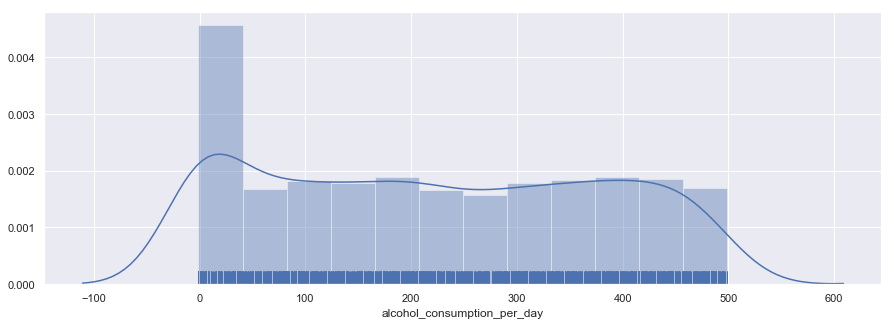

In [35]:
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['alcohol_consumption_per_day'],rug=True);

Distribution is mostly uniformly distributed except near 0 which are mostly the missing values (-1)

In [36]:
#changing back to original data
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].replace(-1,np.nan)
print("Median: {:.2f}".format(df['alcohol_consumption_per_day'].median()))
print("Mean: {:.2f}".format(df['alcohol_consumption_per_day'].mean()))

Median: 250.00
Mean: 251.01


Hence, it is safe to perform median Imputation

In [37]:
median = df['alcohol_consumption_per_day'].median()
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(median)

##### Checking the pairwise relationship of non-categorical features

C:\Users\kapil\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


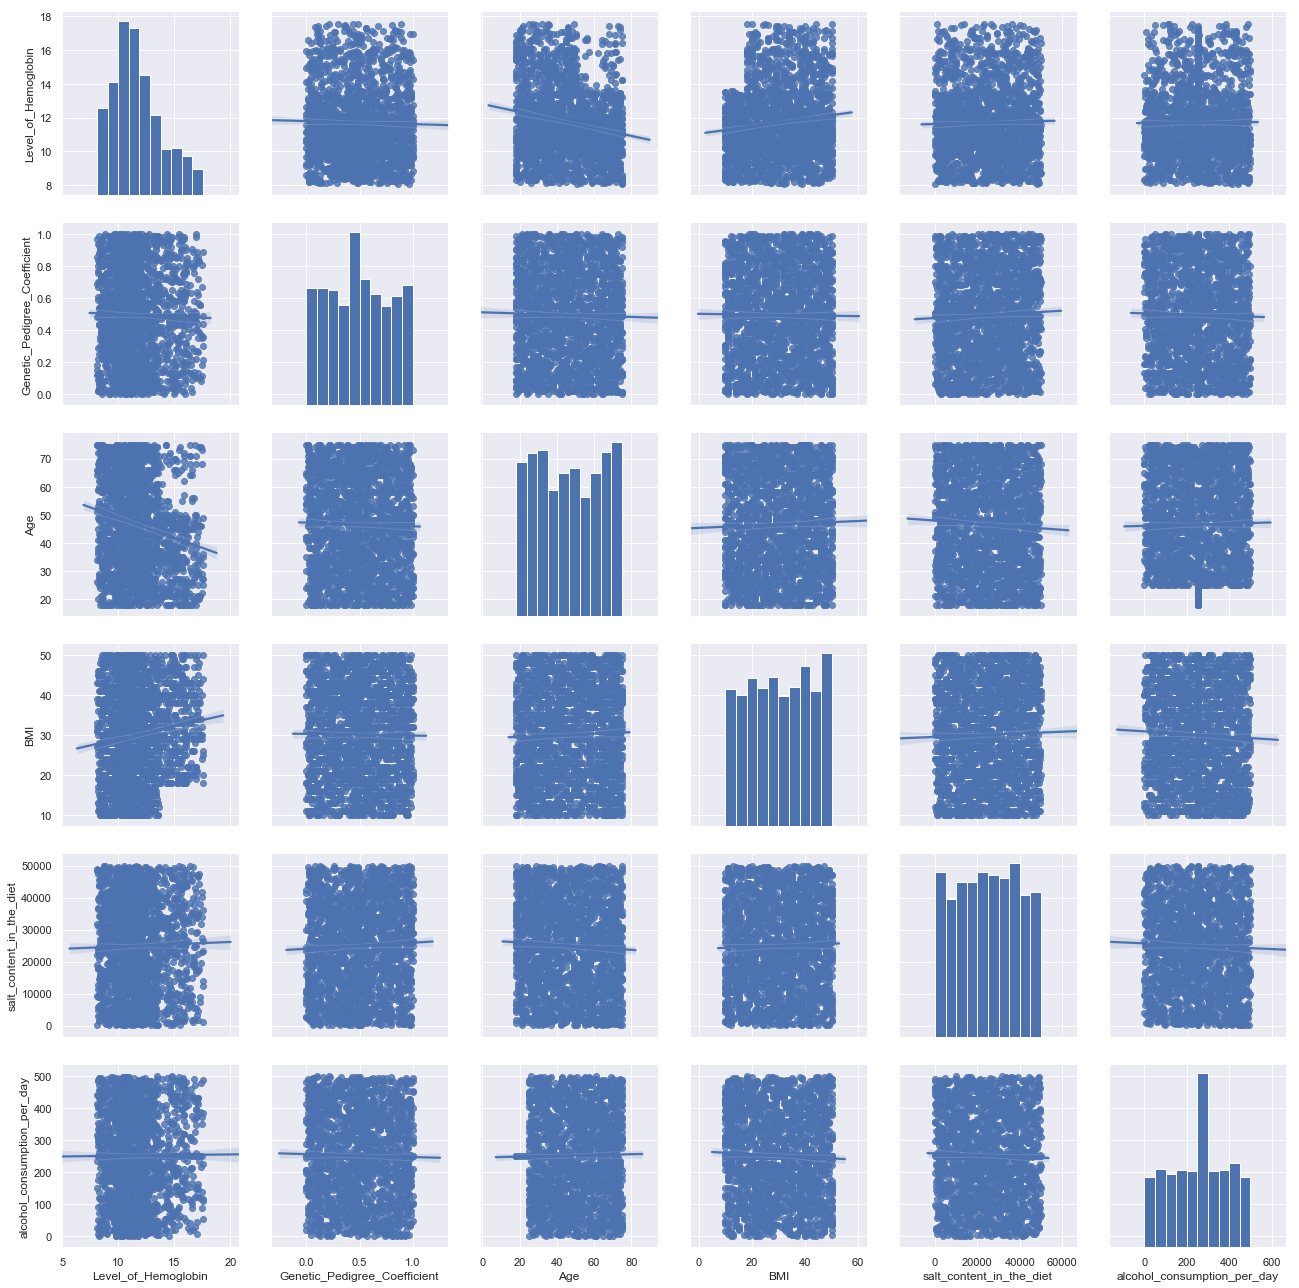

In [38]:
sns.pairplot(df, size=3,
             vars=['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','BMI',
                  'salt_content_in_the_diet','alcohol_consumption_per_day'] ,kind="reg");

##### Mising value treatment in **Pregnancy**
Missing value in df for male patients with (sex=0) is well justified.

In [39]:
print("Male Patient: {}".format(df[df["Sex"]== 0]['Sex'].count()))
print("Female Patient: {}".format(df[df["Sex"]== 1]['Sex'].count()))

Male Patient: 1008
Female Patient: 992


In [40]:
df[df["Sex"]== 1]['Pregnancy'].isnull().value_counts()

True     550
False    442
Name: Pregnancy, dtype: int64

There are 550 missing values among female patients and we can safely replace 1008 pregnancy value of male pateints to 0

In [41]:
df[df["Sex"]== 0]['Pregnancy'].isnull().value_counts()

True    1008
Name: Pregnancy, dtype: int64

In [42]:
df["Pregnancy"]=df["Pregnancy"].replace(df[df["Sex"]== 0]['Pregnancy'] ,0 )

Replacing Pregnancy = 0 for those women who can not bear a child due to Menopause

In [43]:
df[df["Sex"]== 1].loc[df["Age"]>55]['Pregnancy'].fillna(0)

True     550
False    442
Name: Pregnancy, dtype: int64

Most of these women whose pregnancy status we don't know, are mostly around 60 years (see below the *mean* and *mode* and the *count plot*) in age. In such age, it is highly unlikely that they are pregnant.

In [44]:
print("Mean Age of left out women: {:.2f}".format(df[df["Pregnancy"].isnull() == True]["Age"].mean()))
print("Median Age of left out women: {:.2f}".format(df[df["Pregnancy"].isnull() == True]["Age"].median()))

Mean Age of left out women: 60.61
Median Age of left out women: 61.00


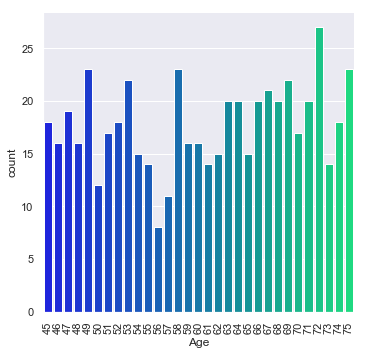

In [45]:
sns.catplot(x="Age", kind="count", palette="winter", data=df[df["Pregnancy"].isnull() == True])
plt.xticks(rotation=90);

In [46]:
df["Pregnancy"]=df["Pregnancy"].replace(np.nan,0 )
df["Pregnancy"].isnull().value_counts()

False    2000
Name: Pregnancy, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Patient_Number                   2000 non-null int64
Blood_Pressure_Abnormality       2000 non-null int64
Level_of_Hemoglobin              2000 non-null float64
Genetic_Pedigree_Coefficient     2000 non-null float64
Age                              2000 non-null int64
BMI                              2000 non-null int64
Sex                              2000 non-null int64
Pregnancy                        2000 non-null float64
Smoking                          2000 non-null int64
Physical_activity                2000 non-null int64
salt_content_in_the_diet         2000 non-null int64
alcohol_consumption_per_day      2000 non-null float64
Level_of_Stress                  2000 non-null int64
Chronic_kidney_disease           2000 non-null int64
Adrenal_and_thyroid_disorders    2000 non-null int64
dtypes: float64(4), int64(11)
memory usage: 234.4 KB


Now we can appply classification models

### Training Naive Bayes

In [48]:
feature_col_names = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient','Age','BMI','Sex','Pregnancy','Smoking',
                     'Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day','Level_of_Stress',
                    'Chronic_kidney_disease','Adrenal_and_thyroid_disorders']
predicted_class_names = ['Blood_Pressure_Abnormality']
X= df[feature_col_names].values
y= df[predicted_class_names].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
nb_predict_train = nb_model.predict(X_train)

# Accuracy
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy on Training data: 0.7757
()


In [50]:
nb_predict_test = nb_model.predict(X_test)

# Accuracy
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy on Test data: 0.7950
()


In [51]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[282  38]
 [ 85 195]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       320
           1       0.84      0.70      0.76       280

   micro avg       0.80      0.80      0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.79       600



### Training Random Forest

In [52]:
params = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [8, 10, 12], 'n_estimators': [10, 20, 30, 100], 'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rf_model = RandomForestClassifier(bootstrap=True, criterion='gini',
            max_depth=80, max_features='auto',
            min_samples_leaf=3, min_samples_split=8,n_estimators=100)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)

print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy on Training data: 0.9557


In [55]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy on Test data: 0.8883


### Training Gradient Booster

In [56]:
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier(n_estimators=100)
clf=clf.fit(X_train, y_train.ravel())
predict_train = clf.predict(X_train)
print("Accuracy on Training data: {0:.4f}".format(metrics.accuracy_score(y_train, predict_train)))

Accuracy on Training data: 0.9386


In [57]:
predict_test = clf.predict(X_test)
print("Accuracy on Test data: {0:.4f}".format(metrics.accuracy_score(y_test, predict_test)))

Accuracy on Test data: 0.9017


In [ ]:
#cross validation on Gradient Booster